# Loading Data from CSV file

* The Pandas library in Python provides excellent, built-in support for time series data.
* Pandas represents time series datasets as a **Series**. 
* A Series is a one-dimensional array with a time label for each row.
* A Dataframe is a collection of series

In [179]:
import pandas as pd
import numpy as np

In [7]:
# Download csv file from resources and put it in working directory
dataframe = pd.read_csv('AAPL.csv', header=0)

#### First five records

In [9]:
dataframe.head()

,Date,Open,High,Low,Close,Adj Close,Volume
0,2015-05-28,32.965000,32.987499,32.775002,32.945000,29.692596,122933200
1,2015-05-29,32.807499,32.862499,32.474998,32.570000,29.354616,203538000
2,2015-06-01,32.570000,32.847500,32.512501,32.634998,29.413195,128451200
3,2015-06-02,32.465000,32.665001,32.330002,32.490002,29.282515,134670400
4,2015-06-03,32.665001,32.735001,32.474998,32.529999,29.318565,123934000


#### Data Type

In [11]:
dataframe['Date'].dtype

dtype('O')

### Loading data with parse_dates

In [13]:
df2 = pd.read_csv('AAPL.csv', header=0 , parse_dates=[0],usecols=['Date', 'Close'])

#### First five records

In [15]:
df2.head()

,Date,Close
0,2015-05-28,32.945000
1,2015-05-29,32.570000
2,2015-06-01,32.634998
3,2015-06-02,32.490002
4,2015-06-03,32.529999


#### Data Type

In [17]:
df2['Date'].dtype

dtype('<M8[ns]')

#### Note
dateparse = lambda x: pd.datetime.strptime(x, '%Y-%m-%d %H:%M:%S')

df = pd.read_csv(.........,parse_dates=[0], date_parser=dateparse)

https://docs.python.org/2/library/datetime.html#strftime-and-strptime-behavior

### Loading Data as a series

In [20]:
dataframe1 = pd.read_csv('AAPL.csv', header=0, parse_dates=[0], index_col=0,usecols=['Date', 'Close'])

In [21]:
series = dataframe1.squeeze()

#### First 5 records

In [23]:
series.head()

Date
2015-05-28    32.945000
2015-05-29    32.570000
2015-06-01    32.634998
2015-06-02    32.490002
2015-06-03    32.529999
Name: Close, dtype: float64

# Exploring Time Series Data

#### Size

In [26]:
series.shape

(1259,)

In [27]:
df2.shape

(1259, 2)

### Querying by time

In [29]:
print(series['2019-01'])

Date
2019-01-02    39.480000
2019-01-03    35.547501
2019-01-04    37.064999
2019-01-07    36.982498
2019-01-08    37.687500
2019-01-09    38.327499
2019-01-10    38.450001
2019-01-11    38.072498
2019-01-14    37.500000
2019-01-15    38.267502
2019-01-16    38.735001
2019-01-17    38.965000
2019-01-18    39.205002
2019-01-22    38.325001
2019-01-23    38.480000
2019-01-24    38.174999
2019-01-25    39.439999
2019-01-28    39.075001
2019-01-29    38.669998
2019-01-30    41.312500
2019-01-31    41.610001
Name: Close, dtype: float64


In [30]:
#df2[(df2['date'] > '1959-01-01') & (df2['date'] <= '1959-01-21')]

### Descriptive Statistics

In [32]:
series.describe()

count    1259.000000
mean       41.997540
std        14.282829
min        22.584999
25%        29.088751
50%        40.215000
75%        50.015001
max        81.800003
Name: Close, dtype: float64

In [33]:
df2.describe()

,Date,Close
count,1259,1259.000000
mean,2017-11-24 18:30:35.742652928,41.997540
min,2015-05-28 00:00:00,22.584999
25%,2016-08-24 12:00:00,29.088751
50%,2017-11-22 00:00:00,40.215000
75%,2019-02-26 12:00:00,50.015001
max,2020-05-27 00:00:00,81.800003
std,NaN,14.282829


# Feature Engineering

* Date time features
* Lag features
* Window features
* Expanding feature


### Date time features

In [37]:
df2.head(5)

,Date,Close
0,2015-05-28,32.945000
1,2015-05-29,32.570000
2,2015-06-01,32.634998
3,2015-06-02,32.490002
4,2015-06-03,32.529999


In [38]:
features = df2.copy()

In [39]:
features['year'] = df2['Date'].dt.year

In [40]:
features['month'] = df2['Date'].dt.month

In [41]:
features['day'] = df2['Date'].dt.day

In [42]:
features.head(5)

,Date,Close,year,month,day
0,2015-05-28,32.945000,2015,5,28
1,2015-05-29,32.570000,2015,5,29
2,2015-06-01,32.634998,2015,6,1
3,2015-06-02,32.490002,2015,6,2
4,2015-06-03,32.529999,2015,6,3


For more detail : https://pandas.pydata.org/pandas-docs/stable//reference/series.html#datetimelike-properties

### Lag features

To create lag1 feature

In [46]:
features['lag1'] =  df2['Close'].shift(1)

In [47]:
features['lag2'] =  df2['Close'].shift(365)

In [48]:
features.head(7)

,Date,Close,year,month,day,lag1,lag2
0,2015-05-28,32.945000,2015,5,28,NaN,NaN
1,2015-05-29,32.570000,2015,5,29,32.945000,NaN
2,2015-06-01,32.634998,2015,6,1,32.570000,NaN
3,2015-06-02,32.490002,2015,6,2,32.634998,NaN
4,2015-06-03,32.529999,2015,6,3,32.490002,NaN
5,2015-06-04,32.340000,2015,6,4,32.529999,NaN
6,2015-06-05,32.162498,2015,6,5,32.340000,NaN


For more detail : https://pandas.pydata.org/pandas-docs/stable//reference/api/pandas.Series.shift.html#pandas.Series.shift

### Window features

In [51]:
features['Roll_mean'] = df2['Close'].rolling(window = 2).mean()

In [52]:
features.head(5)

,Date,Close,year,month,day,lag1,lag2,Roll_mean
0,2015-05-28,32.945000,2015,5,28,NaN,NaN,NaN
1,2015-05-29,32.570000,2015,5,29,32.945000,NaN,32.757500
2,2015-06-01,32.634998,2015,6,1,32.570000,NaN,32.602499
3,2015-06-02,32.490002,2015,6,2,32.634998,NaN,32.562500
4,2015-06-03,32.529999,2015,6,3,32.490002,NaN,32.510000


In [53]:
features['Roll_max'] = df2['Close'].rolling(window = 3).max()

In [54]:
features.head(5)

,Date,Close,year,month,day,lag1,lag2,Roll_mean,Roll_max
0,2015-05-28,32.945000,2015,5,28,NaN,NaN,NaN,NaN
1,2015-05-29,32.570000,2015,5,29,32.945000,NaN,32.757500,NaN
2,2015-06-01,32.634998,2015,6,1,32.570000,NaN,32.602499,32.945000
3,2015-06-02,32.490002,2015,6,2,32.634998,NaN,32.562500,32.634998
4,2015-06-03,32.529999,2015,6,3,32.490002,NaN,32.510000,32.634998


For more detail : https://pandas.pydata.org/pandas-docs/stable//reference/api/pandas.Series.rolling.html#pandas.Series.rolling

### Expanding features

In [57]:
features['Expand_max'] = df2['Close'].expanding().max()

In [58]:
features.head(10)

,Date,Close,year,month,day,lag1,lag2,Roll_mean,Roll_max,Expand_max
0,2015-05-28,32.945000,2015,5,28,NaN,NaN,NaN,NaN,32.945
1,2015-05-29,32.570000,2015,5,29,32.945000,NaN,32.757500,NaN,32.945
2,2015-06-01,32.634998,2015,6,1,32.570000,NaN,32.602499,32.945000,32.945
3,2015-06-02,32.490002,2015,6,2,32.634998,NaN,32.562500,32.634998,32.945
4,2015-06-03,32.529999,2015,6,3,32.490002,NaN,32.510000,32.634998,32.945
5,2015-06-04,32.340000,2015,6,4,32.529999,NaN,32.435000,32.529999,32.945
6,2015-06-05,32.162498,2015,6,5,32.340000,NaN,32.251249,32.529999,32.945
7,2015-06-08,31.950001,2015,6,8,32.162498,NaN,32.056249,32.340000,32.945
8,2015-06-09,31.855000,2015,6,9,31.950001,NaN,31.902501,32.162498,32.945
9,2015-06-10,32.220001,2015,6,10,31.855000,NaN,32.037501,32.220001,32.945


For more detail : https://pandas.pydata.org/pandas-docs/stable//reference/api/pandas.Series.expanding.html#pandas.Series.expanding

# Time Series - Data Visualization

In [61]:
from matplotlib import pyplot as plt
%matplotlib inline

In [62]:
Dataviz_df = df2.copy()

In [63]:
Dataviz_df.head(10)

,Date,Close
0,2015-05-28,32.945000
1,2015-05-29,32.570000
2,2015-06-01,32.634998
3,2015-06-02,32.490002
4,2015-06-03,32.529999
5,2015-06-04,32.340000
6,2015-06-05,32.162498
7,2015-06-08,31.950001
8,2015-06-09,31.855000
9,2015-06-10,32.220001


<Axes: >

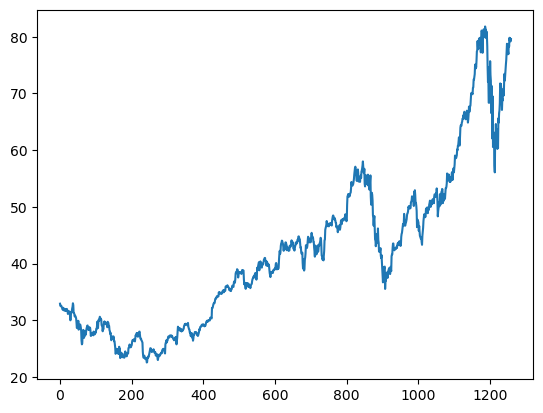

In [64]:
Dataviz_df['Close'].plot()

In [65]:
Dataviz_df.index = Dataviz_df['Date'] 

<Axes: xlabel='Date'>

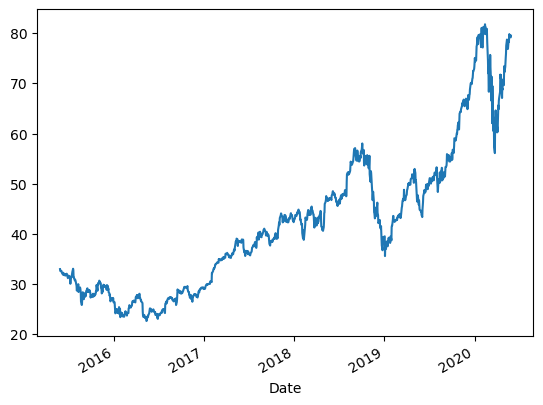

In [66]:
Dataviz_df['Close'].plot()

### Zooming In

In [68]:
Dataviz_df2 = Dataviz_df[(Dataviz_df['Date'] > '2019-01-01') & (Dataviz_df['Date'] <= '2020-01-10')].copy()

In [69]:
Dataviz_df2

,Date,Close
Date,,
2019-01-02,2019-01-02,39.480000
2019-01-03,2019-01-03,35.547501
2019-01-04,2019-01-04,37.064999
2019-01-07,2019-01-07,36.982498
2019-01-08,2019-01-08,37.687500
...,...,...
2020-01-06,2020-01-06,74.949997
2020-01-07,2020-01-07,74.597504
2020-01-08,2020-01-08,75.797501


<Axes: xlabel='Date'>

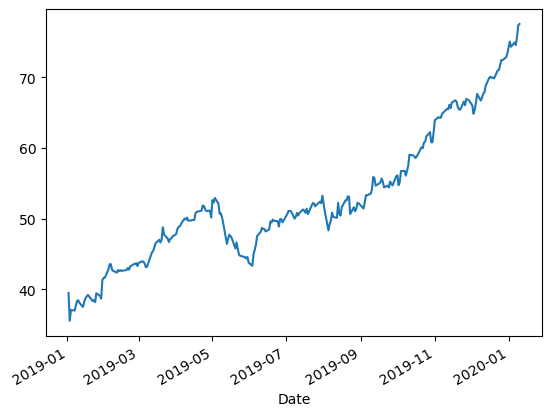

In [70]:
Dataviz_df2['Close'].plot()

### Trendline

In [72]:
import seaborn as sns

<Axes: ylabel='Close'>

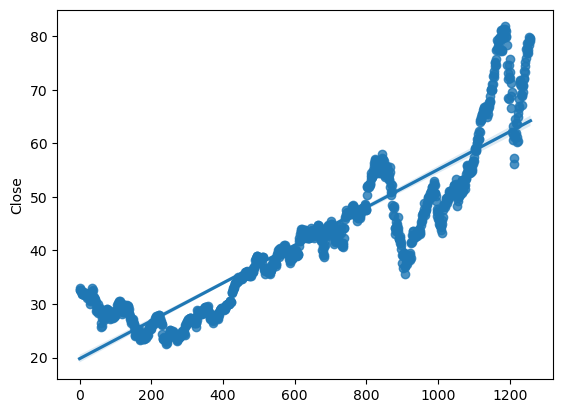

In [73]:
sns.regplot(x= df2.index.values, y=df2['Close'])

<Axes: ylabel='Close'>

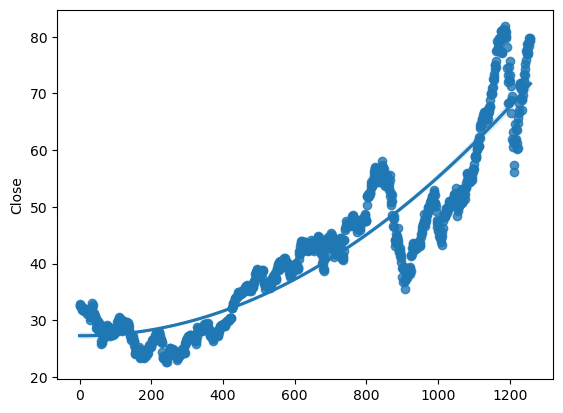

In [74]:
sns.regplot(x= df2.index.values, y=df2['Close'], order =2)

In [75]:
miles_df = pd.read_csv('AAPL.csv', header=0,parse_dates=[0],usecols=[ 'Date','Close'])

In [76]:
miles_df.head()

,Date,Close
0,2015-05-28,32.945000
1,2015-05-29,32.570000
2,2015-06-01,32.634998
3,2015-06-02,32.490002
4,2015-06-03,32.529999


<Axes: >

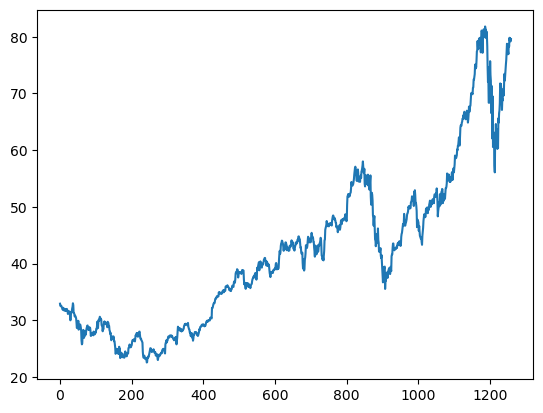

In [77]:
miles_df['Close'].plot()

<Axes: ylabel='Close'>

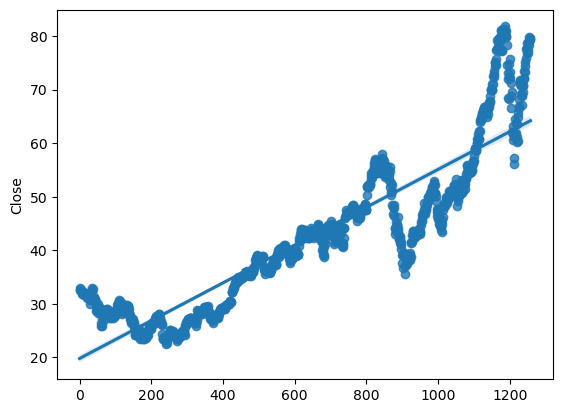

In [78]:
sns.regplot(x= miles_df.index.values, y=miles_df['Close'])

### Removing Seasonality

In [80]:
miles_df['year'] = miles_df['Date'].dt.year

In [81]:
miles_df.head()

,Date,Close,year
0,2015-05-28,32.945000,2015
1,2015-05-29,32.570000,2015
2,2015-06-01,32.634998,2015
3,2015-06-02,32.490002,2015
4,2015-06-03,32.529999,2015


In [82]:
miles_df.groupby('year')['Close'].mean()

year
2015    29.434852
2016    26.151002
2017    37.637769
2018    47.263357
2019    52.063988
2020    73.073713
Name: Close, dtype: float64

<Axes: xlabel='year'>

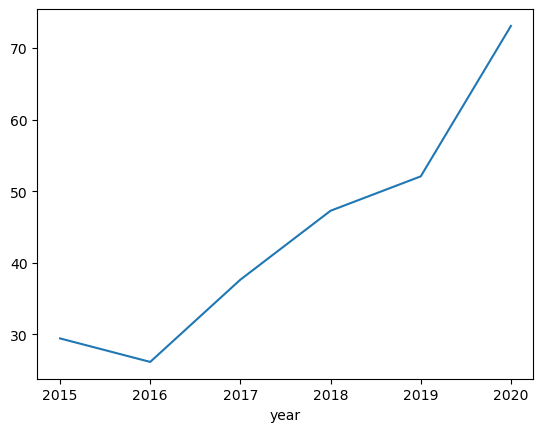

In [83]:
miles_df.groupby('year')['Close'].mean().plot()

### Creating Lag plots

In [85]:
miles_df['lag1'] =  miles_df['Close'].shift(1)

In [86]:
miles_df.head()

,Date,Close,year,lag1
0,2015-05-28,32.945000,2015,NaN
1,2015-05-29,32.570000,2015,32.945000
2,2015-06-01,32.634998,2015,32.570000
3,2015-06-02,32.490002,2015,32.634998
4,2015-06-03,32.529999,2015,32.490002


<Axes: xlabel='lag1', ylabel='Close'>

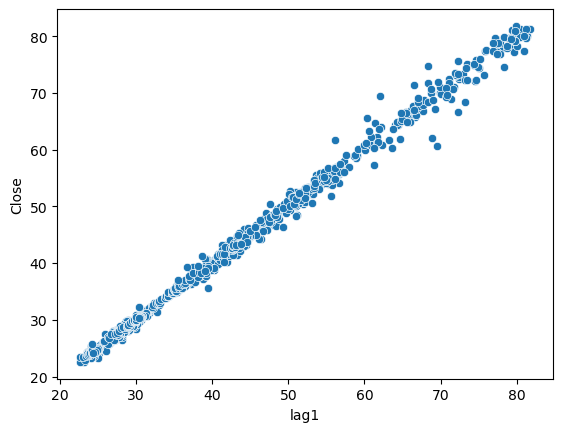

In [87]:
sns.scatterplot(x=miles_df['lag1'], y=miles_df['Close'])

In [88]:
from pandas.plotting import lag_plot

<Axes: xlabel='y(t)', ylabel='y(t + 1)'>

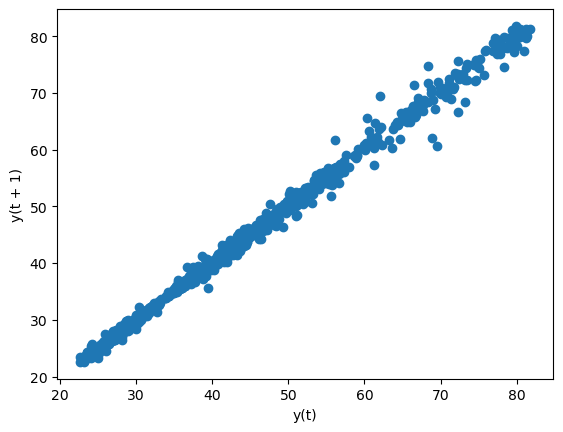

In [89]:
lag_plot(miles_df['Close'])

### Autocorrelation Plots

In [91]:
from pandas.plotting import autocorrelation_plot

<Axes: xlabel='Lag', ylabel='Autocorrelation'>

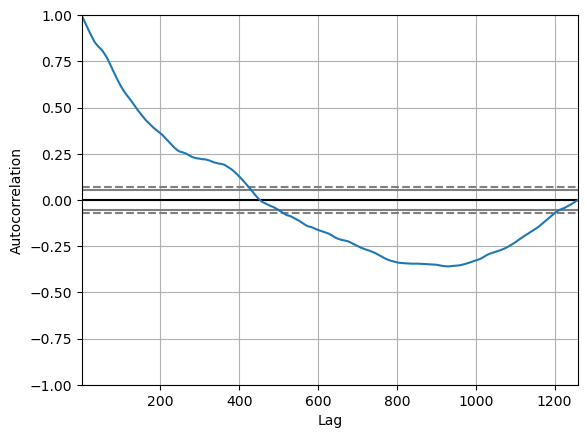

In [92]:
autocorrelation_plot(miles_df['Close'])

## Downsampling and Upsampling

In [94]:
miles_df = pd.read_csv('us-airlines-monthly-aircraft-miles-flown.csv', header=0 , parse_dates=[0])

In [95]:
miles_df.head()

,Month,MilesMM
0,1963-01-01,6827
1,1963-02-01,6178
2,1963-03-01,7084
3,1963-04-01,8162
4,1963-05-01,8462


### Downsampling

In [97]:
quarterly_miles_df = miles_df.resample('Q', on='Month').mean()

In [98]:
quarterly_miles_df.head()

,MilesMM
Month,
1963-03-31,6696.333333
1963-06-30,8756.000000
1963-09-30,10392.333333
1963-12-31,7356.333333
1964-03-31,7287.666667


In [99]:
yearly_total_miles_df = miles_df.resample('A', on='Month').sum()

In [100]:
yearly_total_miles_df.head()

,MilesMM
Month,
1963-12-31,99603
1964-12-31,106192
1965-12-31,115431
1966-12-31,119154
1967-12-31,126515


| Alias  | Description           |
|--------|-----------------------|
| B      | Business day          |
| D      | Calendar day          |
| W      | Weekly                |
| M      | Month end             |
| Q      | Quarter end           |
| A      | Year end              |
| BA     | Business year end     |
| AS     | Year start            |
| H      | Hourly frequency      |
| T, min | Minutely frequency    |
| S      | Secondly frequency    |
| L, ms  | Millisecond frequency |
| U, us  | Microsecond frequency |
| N, ns  | Nanosecond frequency  |

### Upsampling

In [103]:
upsampled_miles_df = miles_df.resample('D', on='Month').mean()

In [104]:
upsampled_miles_df.head(35)

,MilesMM
Month,
1963-01-01,6827.0
1963-01-02,NaN
1963-01-03,NaN
1963-01-04,NaN
1963-01-05,NaN
1963-01-06,NaN
1963-01-07,NaN
1963-01-08,NaN
1963-01-09,NaN


In [105]:
interpolated_miles_df = upsampled_miles_df.interpolate(method='linear')

In [106]:
interpolated_miles_df.head(32)

,MilesMM
Month,
1963-01-01,6827.000000
1963-01-02,6806.064516
1963-01-03,6785.129032
1963-01-04,6764.193548
1963-01-05,6743.258065
1963-01-06,6722.322581
1963-01-07,6701.387097
1963-01-08,6680.451613
1963-01-09,6659.516129


In [107]:
poly_interpolated_miles_df = upsampled_miles_df.interpolate(method='cubic')

<Axes: xlabel='Month'>

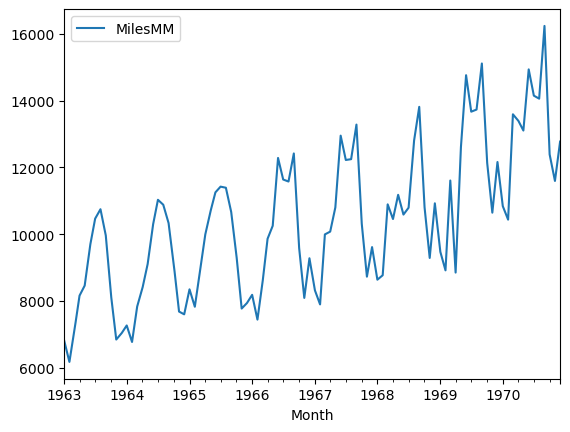

In [108]:
interpolated_miles_df.plot()

In [109]:
poly_interpolated_miles_df = upsampled_miles_df.interpolate(method='spline', order=2)

<Axes: xlabel='Month'>

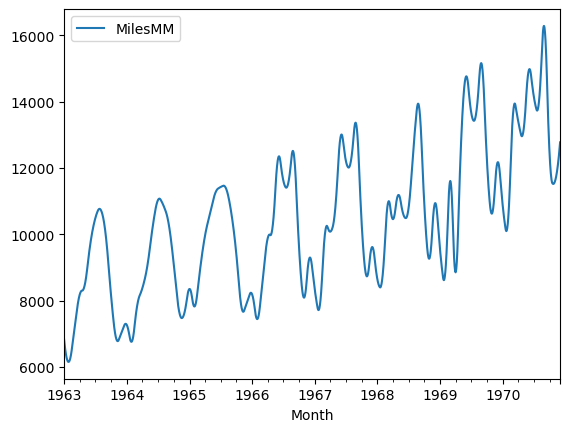

In [110]:
poly_interpolated_miles_df.plot()

| Method  | Description                                               |
|---------|-----------------------------------------------------------|
| bfill   | Backward fill                                             |
| count   | Count of values                                           |
| ffill   | Forward fill                                              |
| first   | First valid data value                                    |
| last    | Last valid data value                                     |
| max     | Maximum data value                                        |
| mean    | Mean of values in time range                              |
| median  | Median of values in time range                            |
| min     | Minimum data value                                        |
| nunique | Number of unique values                                   |
| ohlc    | Opening value, highest value, lowest value, closing value |
| pad     | Same as forward fill                                      |
| std     | Standard deviation of values                              |
| sum     | Sum of values                                             |
| var     | Variance of values                                        |

## Decomposing Time Series

**Additive Model** 

y(t) = Level + Trend + Seasonality + Noise

**Multiplicative Model** 

y(t) = Level * Trend * Seasonality * Noise

In [114]:
from statsmodels.tsa.seasonal import seasonal_decompose

In [115]:
miles_decomp_df= pd.read_csv('AAPL.csv', header=0 , parse_dates=[0],index_col=0,usecols=['Date', 'Close'])

In [116]:
miles_decomp_df.head()

,Close
Date,
2015-05-28,32.945000
2015-05-29,32.570000
2015-06-01,32.634998
2015-06-02,32.490002
2015-06-03,32.529999


In [117]:
#miles_decomp_df.index = miles_decomp_df['Date'] 
miles_decomp_df.index = pd.DatetimeIndex(miles_decomp_df.index, freq=miles_decomp_df.index.inferred_freq)
miles_decomp_df.head()

,Close
Date,
2015-05-28,32.945000
2015-05-29,32.570000
2015-06-01,32.634998
2015-06-02,32.490002
2015-06-03,32.529999


In [118]:
result = seasonal_decompose(miles_decomp_df['Close'], model='additive',period=30)

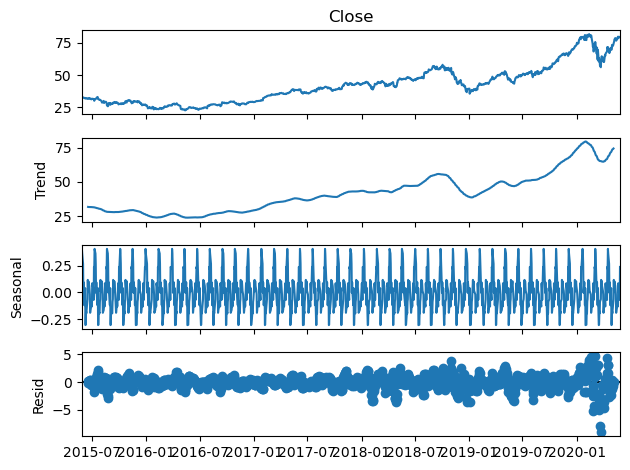

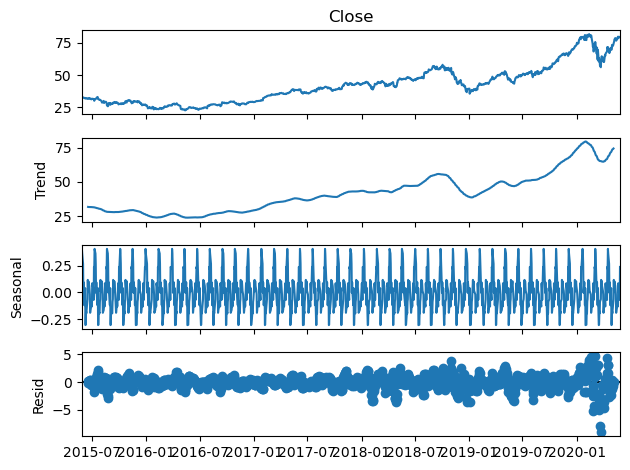

In [119]:
result.plot()

In [120]:
result2 = seasonal_decompose(miles_decomp_df['Close'], model='multiplicative',period=30)

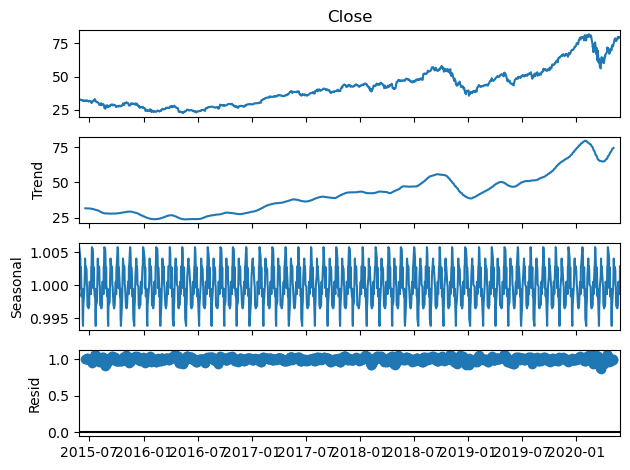

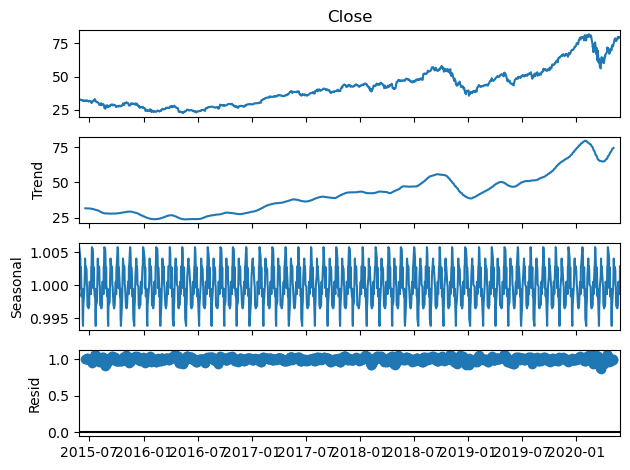

In [121]:
result2.plot()

### Differencing

In [123]:
miles_df = pd.read_csv('us-airlines-monthly-aircraft-miles-flown.csv', header=0 , parse_dates=[0])

In [124]:
miles_df.head()

,Month,MilesMM
0,1963-01-01,6827
1,1963-02-01,6178
2,1963-03-01,7084
3,1963-04-01,8162
4,1963-05-01,8462


In [125]:
miles_df['lag1'] =  miles_df['MilesMM'].shift(1)

In [126]:
miles_df['MilesMM_diff_1'] = miles_df['MilesMM'].diff(periods=1)

In [127]:
miles_df.head()

,Month,MilesMM,lag1,MilesMM_diff_1
0,1963-01-01,6827,NaN,NaN
1,1963-02-01,6178,6827.0,-649.0
2,1963-03-01,7084,6178.0,906.0
3,1963-04-01,8162,7084.0,1078.0
4,1963-05-01,8462,8162.0,300.0


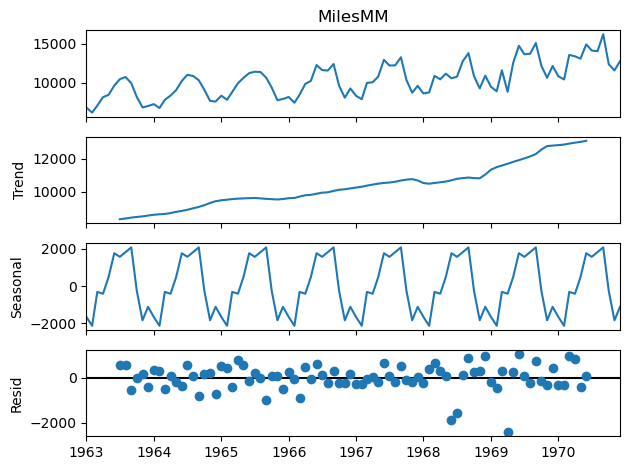

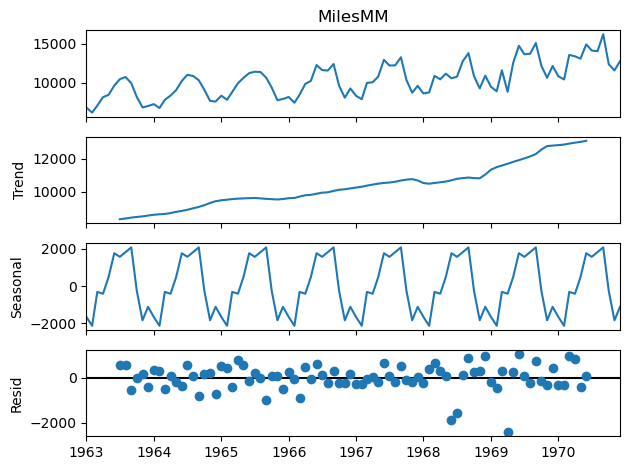

In [128]:
miles_df.index = miles_df['Month'] 
result_a = seasonal_decompose(miles_df['MilesMM'], model='additive')
result_a.plot()

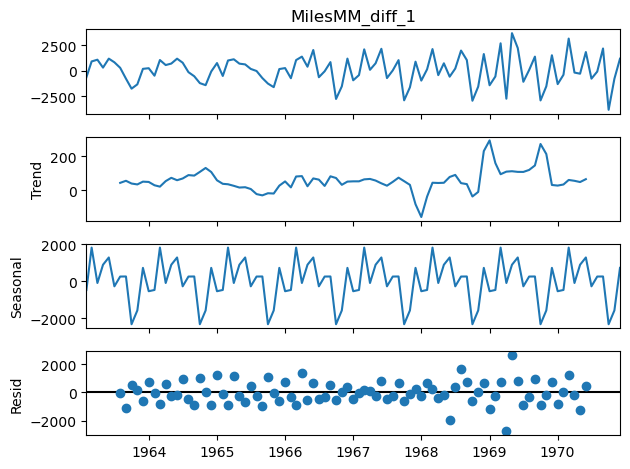

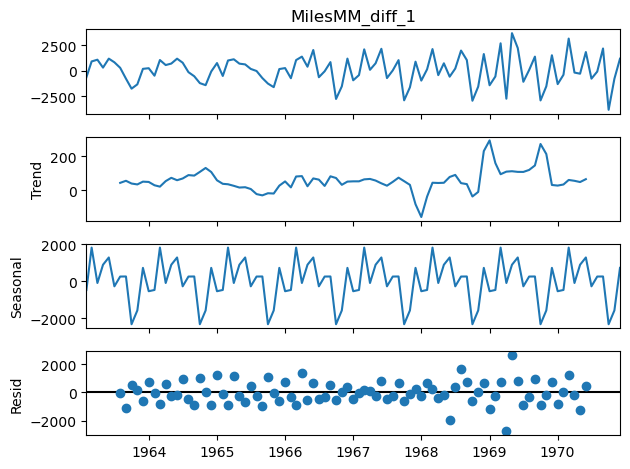

In [129]:
miles_df.index = miles_df['Month'] 
result_b = seasonal_decompose(miles_df.iloc[1:,3], model='additive')
result_b.plot()

<Axes: xlabel='Month'>

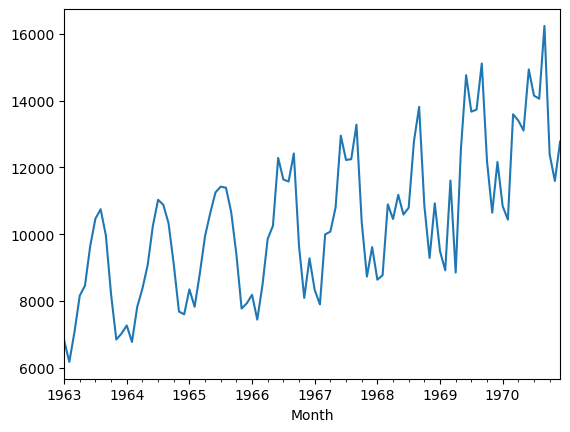

In [130]:
miles_df['MilesMM'].plot()

<Axes: xlabel='Month'>

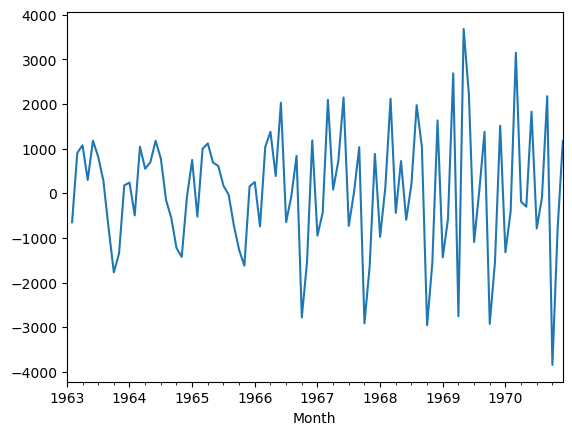

In [131]:
miles_df['MilesMM_diff_1'].plot() 

In [132]:
miles_df['MilesMM_diff_12'] = miles_df['MilesMM_diff_1'].diff(periods=12)

<Axes: xlabel='Month'>

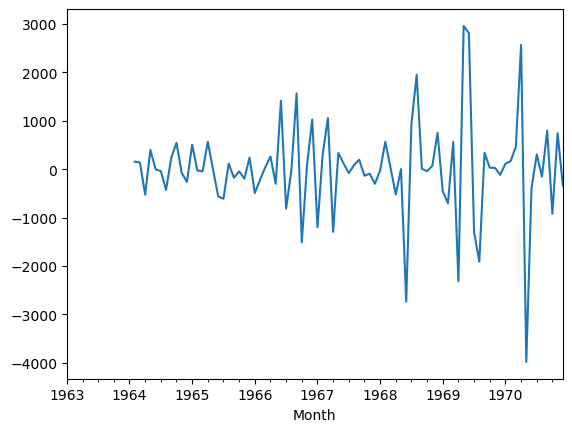

In [133]:
miles_df['MilesMM_diff_12'].plot() 

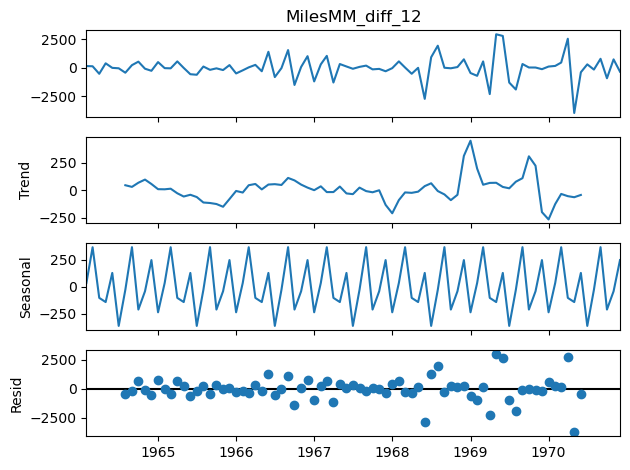

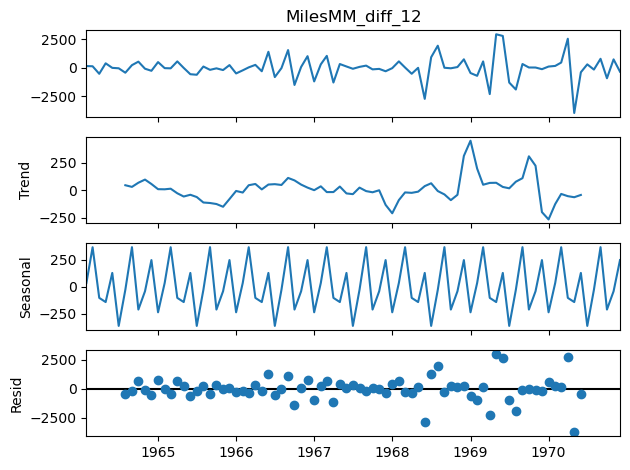

In [134]:
result_c = seasonal_decompose(miles_df.iloc[13:,4], model='additive')
result_c.plot()

In [135]:
miles_df.head(50)

,Month,MilesMM,lag1,MilesMM_diff_1,MilesMM_diff_12
Month,,,,,
1963-01-01,1963-01-01,6827,NaN,NaN,NaN
1963-02-01,1963-02-01,6178,6827.0,-649.0,NaN
1963-03-01,1963-03-01,7084,6178.0,906.0,NaN
1963-04-01,1963-04-01,8162,7084.0,1078.0,NaN
1963-05-01,1963-05-01,8462,8162.0,300.0,NaN
1963-06-01,1963-06-01,9644,8462.0,1182.0,NaN
1963-07-01,1963-07-01,10466,9644.0,822.0,NaN
1963-08-01,1963-08-01,10748,10466.0,282.0,NaN
1963-09-01,1963-09-01,9963,10748.0,-785.0,NaN


## Test-Train Split

In [137]:
temp_df = pd.read_csv('daily-min-temperatures.csv', header=0 , parse_dates=[0])

In [138]:
temp_df.head()

,Date,Temp
0,1981-01-01,20.7
1,1981-01-02,17.9
2,1981-01-03,18.8
3,1981-01-04,14.6
4,1981-01-05,15.8


In [139]:
temp_df.tail()

,Date,Temp
3645,1990-12-27,14.0
3646,1990-12-28,13.6
3647,1990-12-29,13.5
3648,1990-12-30,15.7
3649,1990-12-31,13.0


In [140]:
temp_df.shape

(3650, 2)

In [141]:
temp_df.shape[0]

3650

In [142]:
train_size = int(temp_df.shape[0]*0.8)
train_size

2920

In [143]:
train =  temp_df[0:train_size]

In [144]:
test =  temp_df[train_size:]

In [145]:
train.shape

(2920, 2)

In [146]:
test.shape

(730, 2)

### Walk Forward Validation

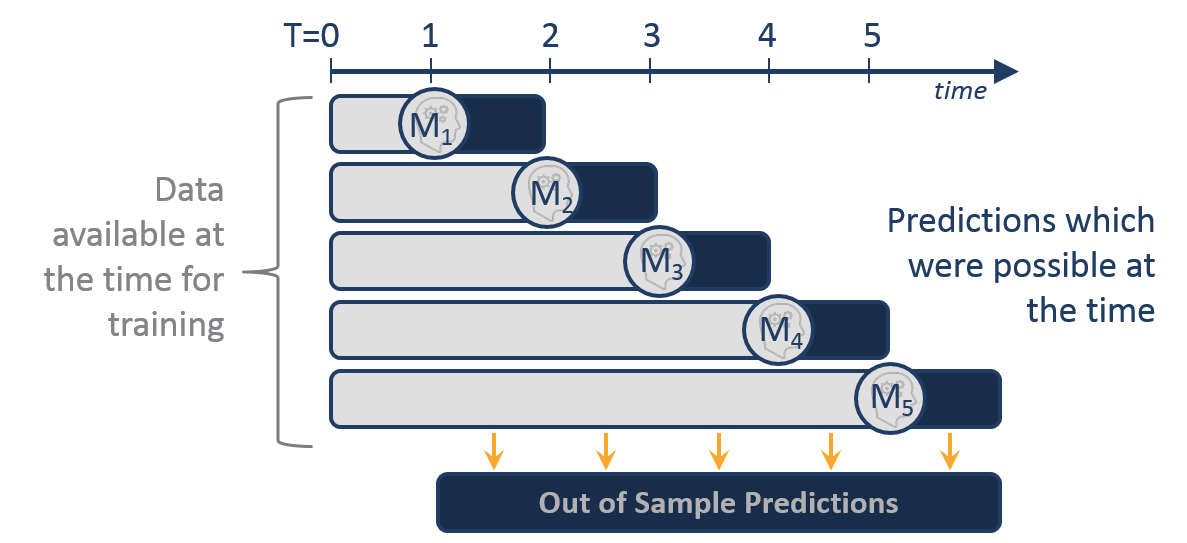

### Persistence Model

In [150]:
df = pd.read_csv('daily-min-temperatures.csv', header=0 , parse_dates=[0])

In [151]:
df.head()

,Date,Temp
0,1981-01-01,20.7
1,1981-01-02,17.9
2,1981-01-03,18.8
3,1981-01-04,14.6
4,1981-01-05,15.8


In [152]:
df['t'] =  df['Temp'].shift(1)

In [153]:
df.head()

,Date,Temp,t
0,1981-01-01,20.7,NaN
1,1981-01-02,17.9,20.7
2,1981-01-03,18.8,17.9
3,1981-01-04,14.6,18.8
4,1981-01-05,15.8,14.6


In [154]:
train, test = df[1:df.shape[0]-7], df[df.shape[0]-7:]

In [155]:
train.head()

,Date,Temp,t
1,1981-01-02,17.9,20.7
2,1981-01-03,18.8,17.9
3,1981-01-04,14.6,18.8
4,1981-01-05,15.8,14.6
5,1981-01-06,15.8,15.8


In [156]:
train_X, train_y = train['t'], train['Temp']
test_X, test_y = test['t'], test['Temp']

#### # walk-forward validation

In [158]:
predictions = test_X.copy()

In [159]:
print(predictions)
print(test_y)

3643    10.0
3644    12.9
3645    14.6
3646    14.0
3647    13.6
3648    13.5
3649    15.7
Name: t, dtype: float64
3643    12.9
3644    14.6
3645    14.0
3646    13.6
3647    13.5
3648    15.7
3649    13.0
Name: Temp, dtype: float64


In [160]:
from sklearn.metrics import mean_squared_error
mse = mean_squared_error(test_y, predictions)
mse

3.4228571428571413

In [161]:
from matplotlib import pyplot

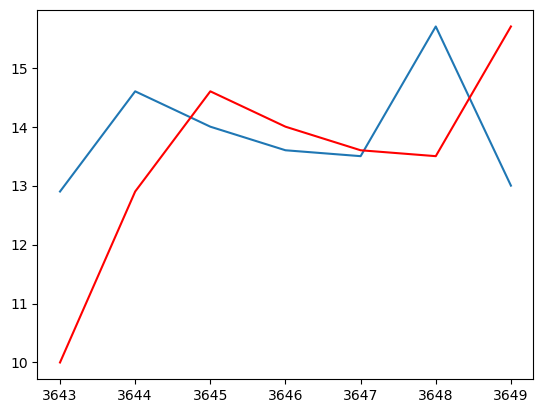

In [162]:
pyplot.plot(test_y)
pyplot.plot(predictions, color='red')

### Autoregression Model

In [164]:
df = pd.read_csv('daily-min-temperatures.csv', header=0 , parse_dates=[0])

In [165]:
train, test = df.Temp[1:df.shape[0]-7], df.Temp[df.shape[0]-7:]

In [166]:
train.head()

1    17.9
2    18.8
3    14.6
4    15.8
5    15.8
Name: Temp, dtype: float64

In [167]:
a=len(train)
b=len(test)
print(a)
print(b)
train[3642]
#test[3643]

3642
7


10.0

In [168]:
from statsmodels.tsa.ar_model import AutoReg

In [169]:
model = AutoReg(train,29)
model_fit = model.fit()

#### No. of lag Variables

In [171]:
#model_fit.k_ar

#### Coef of lag variables

In [173]:
model_fit.params

const       0.557544
Temp.L1     0.588595
Temp.L2    -0.090826
Temp.L3     0.048262
Temp.L4     0.040065
Temp.L5     0.039302
Temp.L6     0.025946
Temp.L7     0.044668
Temp.L8     0.012768
Temp.L9     0.037436
Temp.L10   -0.000812
Temp.L11    0.004791
Temp.L12    0.018473
Temp.L13    0.026891
Temp.L14    0.000576
Temp.L15    0.024810
Temp.L16    0.007403
Temp.L17    0.009916
Temp.L18    0.034160
Temp.L19   -0.009120
Temp.L20    0.024213
Temp.L21    0.018787
Temp.L22    0.012184
Temp.L23   -0.018553
Temp.L24   -0.001772
Temp.L25    0.016732
Temp.L26    0.019762
Temp.L27    0.009832
Temp.L28    0.006227
Temp.L29   -0.001377
dtype: float64

In [174]:
predictions = model_fit.predict(start=(len(train)), end=len(train)+len(test)-1)

In [175]:
predictions

3643    13.053794
3644    13.532591
3645    13.243126
3646    13.091438
3647    13.146989
3648    13.176153
3649          NaN
dtype: float64

In [176]:
predictions.iloc[0]

13.053794217229827

In [177]:
from sklearn.metrics import mean_squared_error
mse = mean_squared_error(test_y, predictions[:7])
mse

ValueError: Input contains NaN.

In [ ]:
pyplot.plot(test_y)
pyplot.plot(predictions, color='red')

### Walk Forward

In [ ]:
df = pd.read_csv('daily-min-temperatures.csv', header=0 , parse_dates=[0])

In [ ]:
train, test = df.Temp[1:df.shape[0]-7], df.Temp[df.shape[0]-7:]

In [ ]:
data = train
predict =[]
for t in test:
    model = AutoReg(data,29)
    model_fit = model.fit()
    y = model_fit.predict(start=len(data), end=len(train)+len(test)-1)
    print(y.values[0])
    predict.append(y.values[0])
    data = np.append(data, t)
    data = pd.Series(data)
    

In [ ]:
predict


In [ ]:
from sklearn.metrics import mean_squared_error
mse = mean_squared_error(test.values, predict)
mse

In [ ]:
pyplot.plot(test.values)
pyplot.plot(predict, color='red')

### Moving Average Model

In [ ]:
df = pd.read_csv('daily-min-temperatures.csv', header=0 , parse_dates=[0])

In [ ]:
df['t'] =  df['Temp'].shift(1)

In [ ]:
df['Resid'] = df['Temp'] - df['t']

In [ ]:
df.head()

In [ ]:
train, test = df.Resid[1:df.shape[0]-7], df.Resid[df.shape[0]-7:]

In [ ]:
train.head()

In [ ]:
from statsmodels.tsa.ar_model import AutoReg

In [ ]:
model = AutoReg(train,29)
model_fit = model.fit()

In [ ]:
#model_fit.k_ar

In [ ]:
model_fit.params

In [ ]:
pred_resid = model_fit.predict(start=len(train), end=len(train)+len(test))

In [ ]:
pred_resid

In [ ]:
df.t[df.shape[0]-7:]

In [ ]:
predictions = df.t[df.shape[0]-7:] + pred_resid[0:7]

In [ ]:
predictions

In [ ]:
from sklearn.metrics import mean_squared_error
mse = mean_squared_error(test_y, predictions)
mse

In [ ]:
pyplot.plot(test_y)
pyplot.plot(predictions, color='red')

## ARIMA Model

In [1]:
df = pd.read_csv('AAPL.csv', header=0, parse_dates=['Date'],index_col='Date',usecols=['Date', 'Close'])
start_date = '2019-05-28'
end_date = '2020-05-27'
last_year_data = df.loc[start_date:end_date]


NameError: name 'pd' is not defined

In [183]:
df.head()

,Close
Date,
2015-05-28,32.945000
2015-05-29,32.570000
2015-06-01,32.634998
2015-06-02,32.490002
2015-06-03,32.529999


In [185]:
last_year_data.head()

,Close
Date,
2019-05-28,44.557499
2019-05-29,44.345001
2019-05-30,44.575001
2019-05-31,43.767502
2019-06-03,43.325001


<Axes: xlabel='Date'>

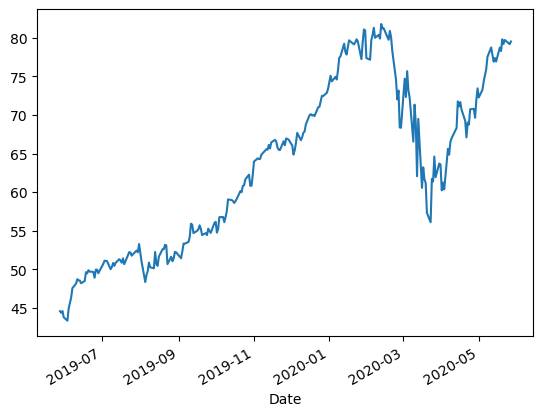

In [187]:
last_year_data['Close'].plot()

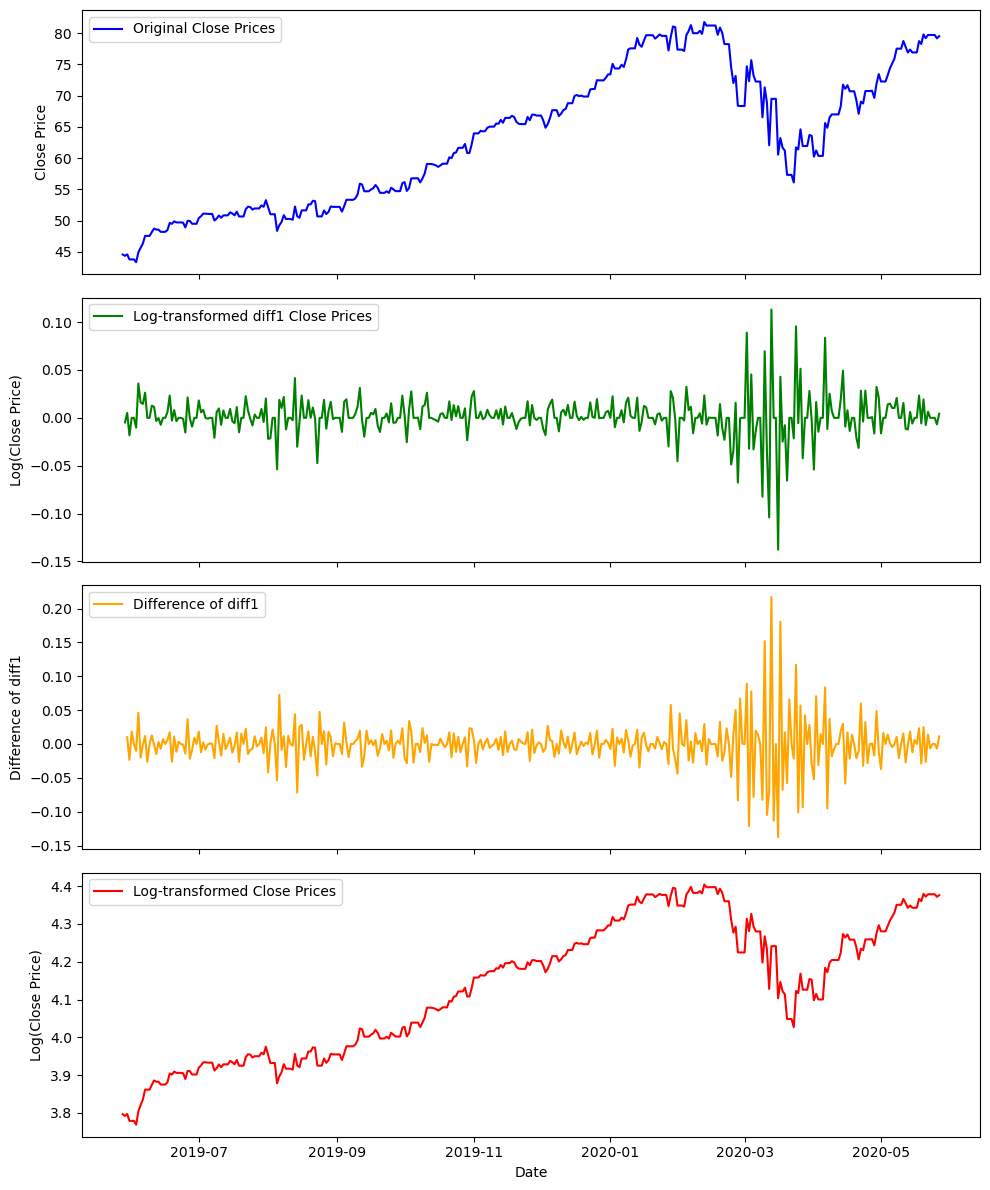

In [189]:


# Assuming last_year_data is already defined and prepared as in your example

# Ensure the index is a DatetimeIndex and has the correct frequency
last_year_data.index = pd.to_datetime(last_year_data.index)
last_year_data = last_year_data.asfreq('D').ffill()  # Use ffill() for forward fill

# Apply logarithmic transformation
last_year_data['Log_Close'] = np.log(last_year_data['Close'])

# Calculate lagged columns
last_year_data['Lag1_Close'] = last_year_data['Log_Close'].shift(1)
last_year_data['diff1'] = last_year_data['Log_Close'] - last_year_data['Lag1_Close']
last_year_data['diff2'] = last_year_data['diff1'] - last_year_data['diff1'].shift(1)

# Plotting all data
fig, (ax1, ax2, ax3, ax4) = plt.subplots(4, 1, figsize=(10, 12), sharex=True)

# Original Close Prices
ax1.plot(last_year_data.index, last_year_data['Close'], label='Original Close Prices', color='blue')
ax1.set_ylabel('Close Price')
ax1.legend(loc='upper left')

# Log-transformed diff1 Close Prices
ax2.plot(last_year_data.index, last_year_data['diff1'], label='Log-transformed diff1 Close Prices', color='green')
ax2.set_ylabel('Log(Close Price)')
ax2.legend(loc='upper left')

# Lag1 Close Prices
ax3.plot(last_year_data.index, last_year_data['diff2'], label='Difference of diff1', color='orange')
ax3.set_ylabel('Difference of diff1')
ax3.legend(loc='upper left')

# Lag2 Close Prices (just for illustration, since it wasn't originally requested)
ax4.plot(last_year_data.index, last_year_data['Log_Close'], label='Log-transformed Close Prices', color='red')
ax4.set_ylabel('Log(Close Price)')
ax4.set_xlabel('Date')
ax4.legend(loc='upper left')

plt.tight_layout()
plt.show()


In [191]:
last_year_data.head()

,Close,Log_Close,Lag1_Close,diff1,diff2
Date,,,,,
2019-05-28,44.557499,3.796780,NaN,NaN,NaN
2019-05-29,44.345001,3.792000,3.796780,-0.004780,NaN
2019-05-30,44.575001,3.797173,3.792000,0.005173,0.009954
2019-05-31,43.767502,3.778892,3.797173,-0.018282,-0.023455
2019-06-01,43.767502,3.778892,3.778892,0.000000,0.018282


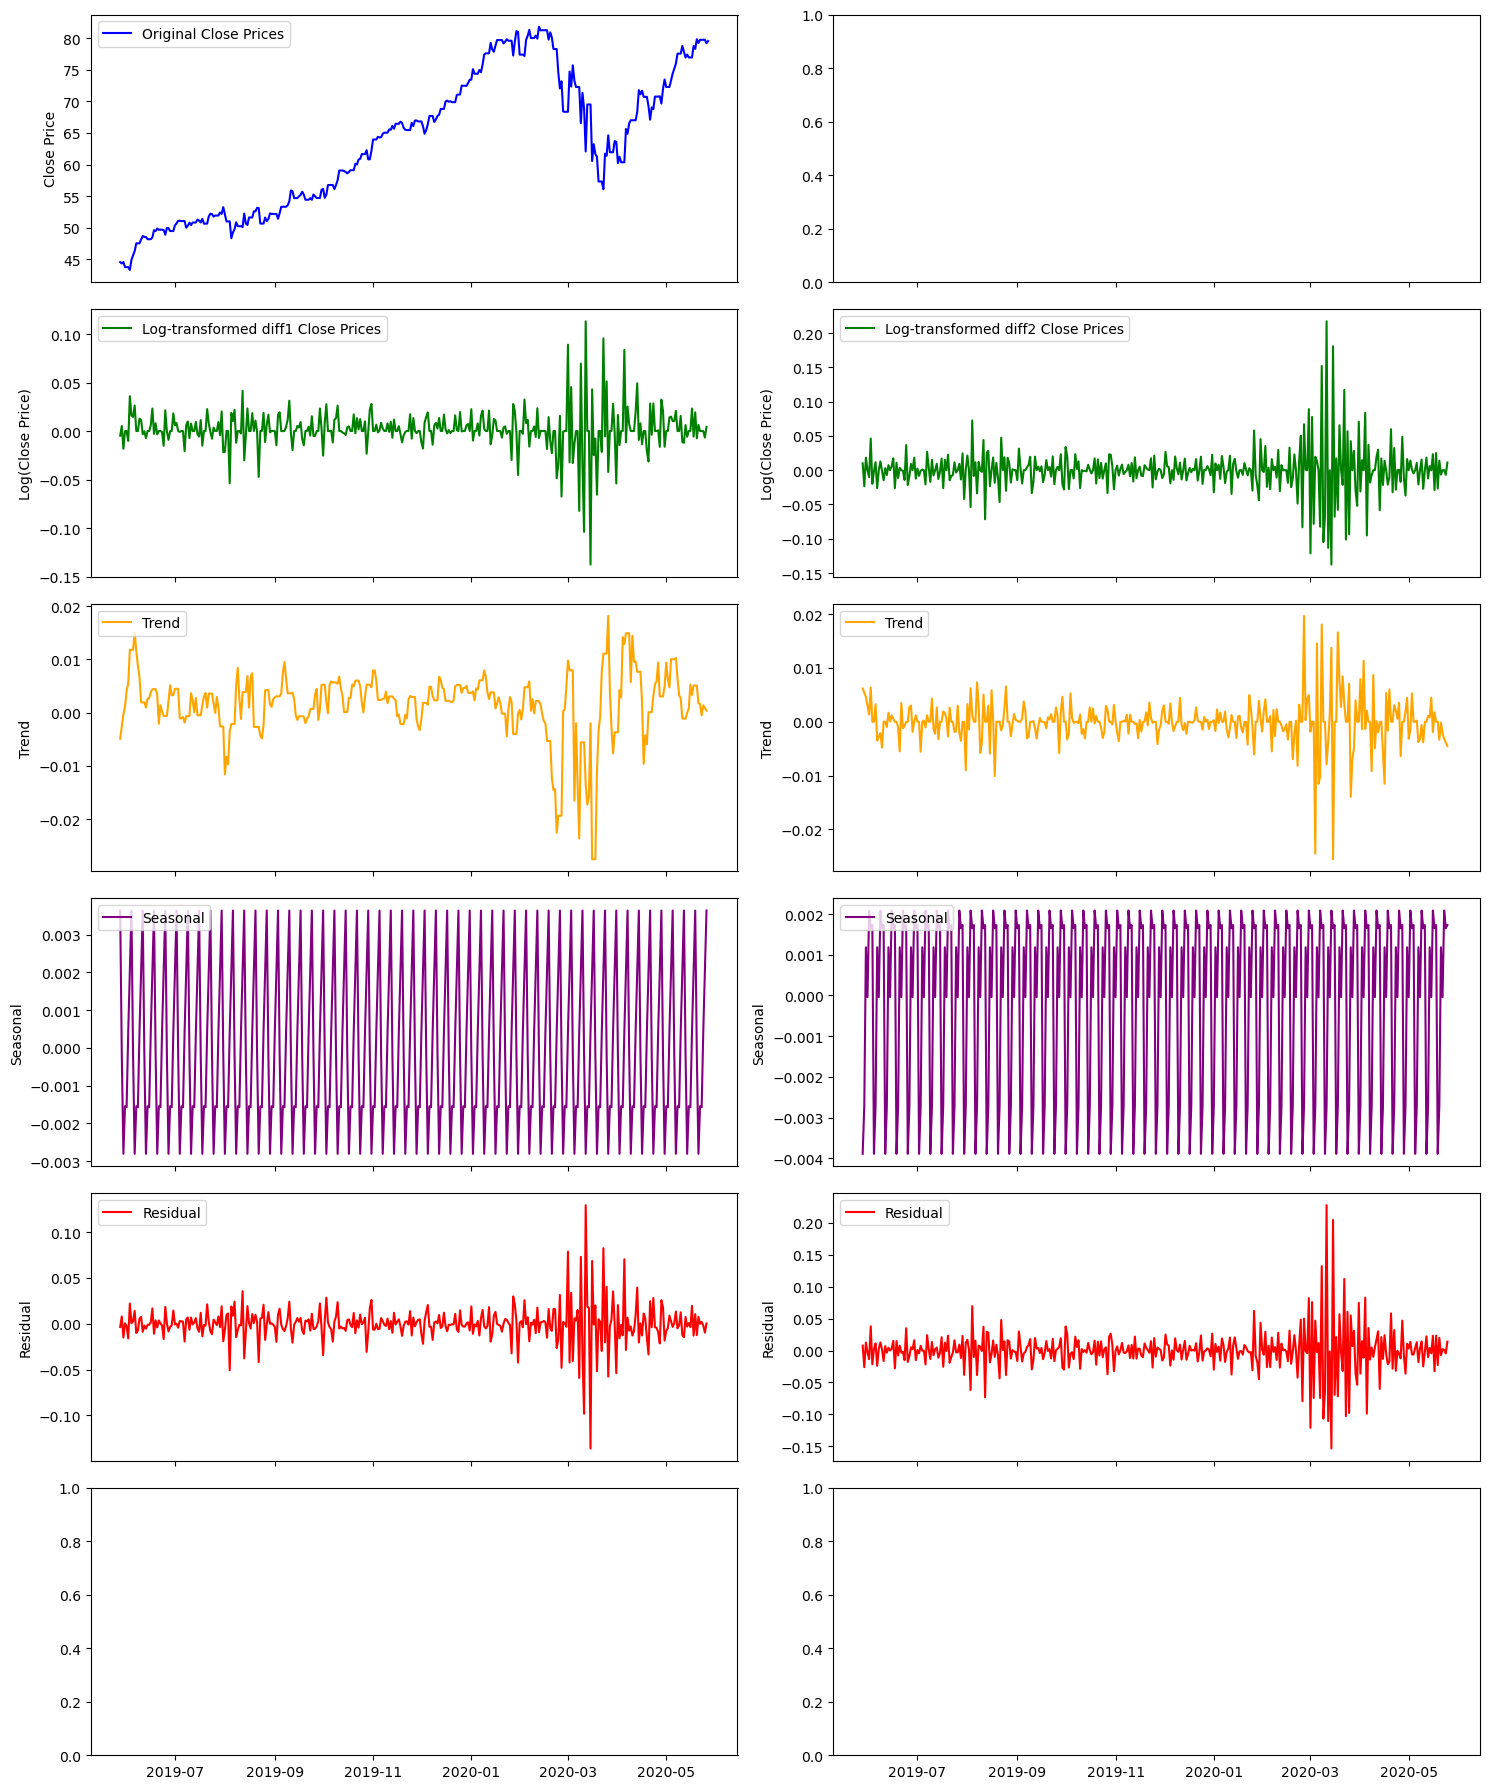

In [193]:
# Perform additive decomposition on diff1
decomposition_diff1 = seasonal_decompose(last_year_data['diff1'].dropna(), model='additive', extrapolate_trend='freq')

# Perform additive decomposition on diff2
decomposition_diff2 = seasonal_decompose(last_year_data['diff2'].dropna(), model='additive', extrapolate_trend='freq')


# Plotting the decomposed components
fig, axes = plt.subplots(6, 2, figsize=(15,18), sharex=True)

# Original Close Prices
axes[0, 0].plot(last_year_data.index, last_year_data['Close'], label='Original Close Prices', color='blue')
axes[0, 0].set_ylabel('Close Price')
axes[0, 0].legend(loc='upper left')

# Log-transformed diff2 Close Prices
axes[1, 1].plot(last_year_data.index[:-2], last_year_data['diff2'].dropna().values, label='Log-transformed diff2 Close Prices', color='green')
axes[1, 1].set_ylabel('Log(Close Price)')
axes[1, 1].legend(loc='upper left')

# Trend, Seasonal, Residual for diff2
axes[2, 1].plot(last_year_data.index[:-2], decomposition_diff2.trend, label='Trend', color='orange')
axes[2, 1].set_ylabel('Trend')
axes[2, 1].legend(loc='upper left')

axes[3, 1].plot(last_year_data.index[:-2], decomposition_diff2.seasonal, label='Seasonal', color='purple')
axes[3, 1].set_ylabel('Seasonal')
axes[3, 1].legend(loc='upper left')

axes[4, 1].plot(last_year_data.index[:-2], decomposition_diff2.resid, label='Residual', color='red')
axes[4, 1].set_ylabel('Residual')
axes[4, 1].legend(loc='upper left')

# Log-transformed diff3 Close Prices
axes[1, 0].plot(last_year_data.index[:-1], last_year_data['diff1'].dropna().values, label='Log-transformed diff1 Close Prices', color='green')
axes[1, 0].set_ylabel('Log(Close Price)')
axes[1, 0].legend(loc='upper left')

# Trend, Seasonal, Residual for diff3
axes[2, 0].plot(last_year_data.index[:-1], decomposition_diff1.trend, label='Trend', color='orange')
axes[2, 0].set_ylabel('Trend')
axes[2, 0].legend(loc='upper left')

axes[3, 0].plot(last_year_data.index[:-1], decomposition_diff1.seasonal, label='Seasonal', color='purple')
axes[3, 0].set_ylabel('Seasonal')
axes[3, 0].legend(loc='upper left')

axes[4, 0].plot(last_year_data.index[:-1], decomposition_diff1.resid, label='Residual', color='red')
axes[4, 0].set_ylabel('Residual')
axes[4, 0].legend(loc='upper left')

plt.tight_layout()
plt.show()


Trend is Polynomial.  
D =2

### Autocorrelation Plot

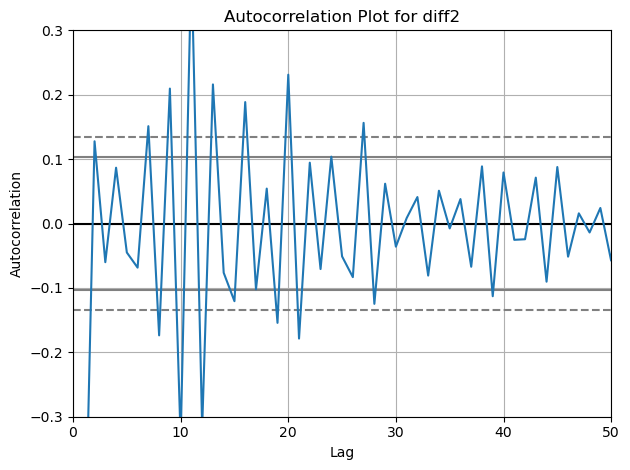

In [195]:


from pandas.plotting import autocorrelation_plot
import matplotlib.pyplot as plt

# Example: Assuming last_year_data['diff3'] is your time series data

# Compute autocorrelation and plot
autocorrelation_plot(last_year_data['diff2'].dropna())
plt.title('Autocorrelation Plot for diff2')
plt.xlim(0, 50)  # Adjust xlim to zoom in on specific range of lags (change 50 as needed)
plt.ylim(-0.3, 0.3)  # Adjust ylim to zoom in on specific range of autocorrelation values
plt.xlabel('Lag')
plt.ylabel('Autocorrelation')
plt.grid(True)
plt.tight_layout()
plt.show()

q=28

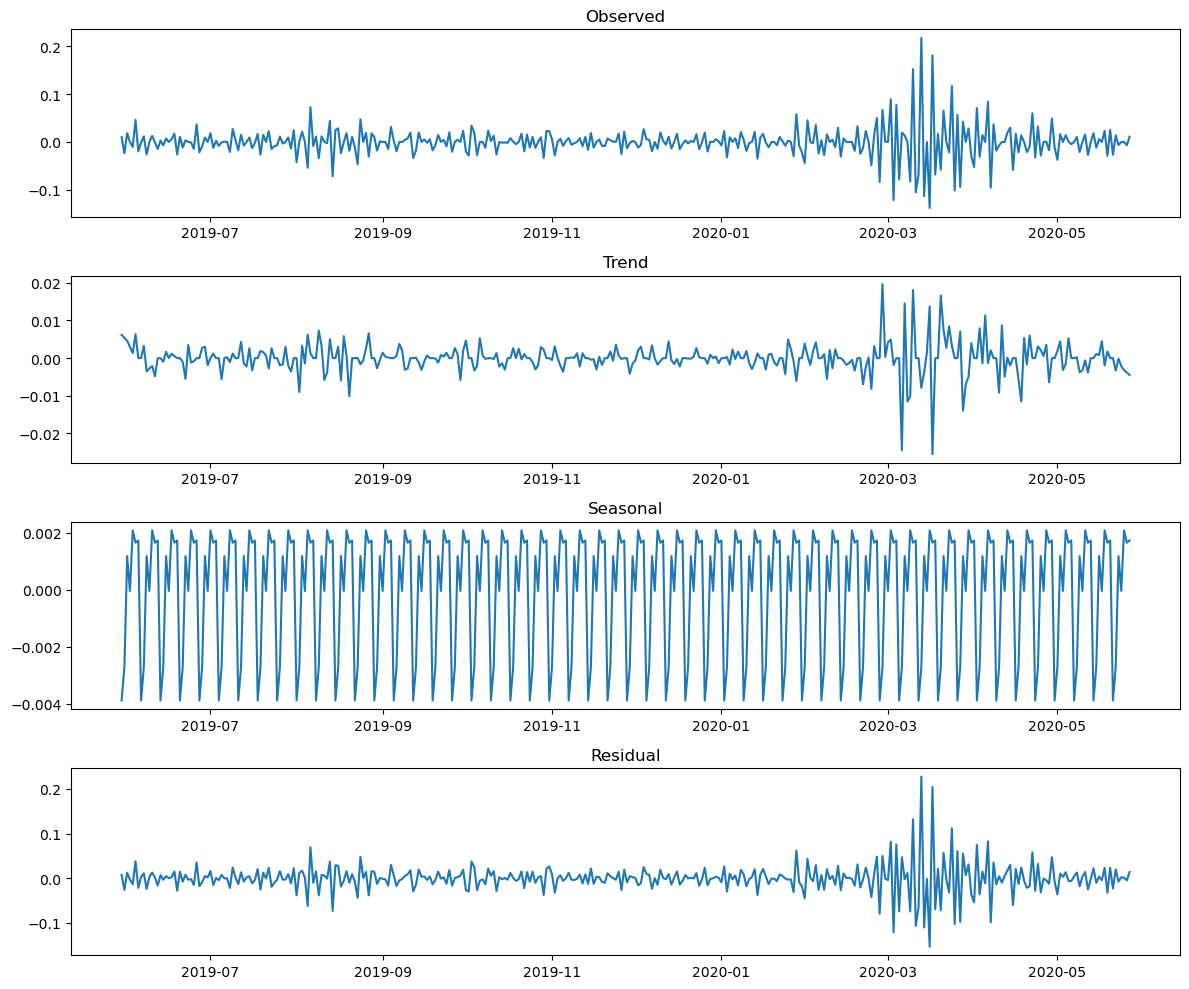

In [197]:
from statsmodels.tsa.seasonal import seasonal_decompose

# Ensure the index is a DatetimeIndex and has the correct frequency
last_year_data.index = pd.to_datetime(last_year_data.index)
last_year_data = last_year_data.asfreq('D').ffill()  # Ensure daily frequency with forward fill

# Perform additive decomposition on diff3
decomposition = seasonal_decompose(last_year_data['diff2'].dropna(), model='additive', extrapolate_trend='freq')

# Plot the decomposed components
fig, (ax1, ax2, ax3, ax4) = plt.subplots(4, 1, figsize=(12, 10))

# Observed
ax1.plot(decomposition.observed)
ax1.set_title('Observed')

# Trend
ax2.plot(decomposition.trend)
ax2.set_title('Trend')

# Seasonal
ax3.plot(decomposition.seasonal)
ax3.set_title('Seasonal')

# Residual
ax4.plot(decomposition.resid)
ax4.set_title('Residual')

plt.tight_layout()
plt.show()


### Partial Autocorrelation Graph

In [199]:
from statsmodels.graphics.tsaplots import plot_pacf
import matplotlib.pyplot as plt

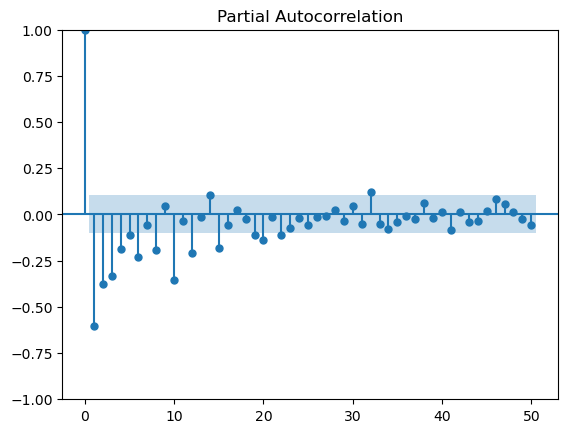

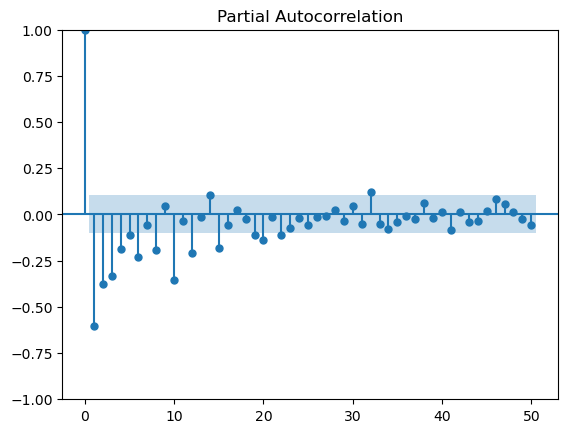

In [201]:
plot_pacf(last_year_data['diff2'].dropna(), lags=50)

 p = 32

In [203]:
from statsmodels.tsa.arima.model import ARIMA

In [205]:
last_year_data.index = pd.to_datetime(last_year_data.index)
last_year_data = last_year_data.asfreq('D')  

# Ensure the index has the correct frequency


In [211]:
order = (10, 0, 20)  # Example values, adjust as per your analysis and model diagnostics

# Create the ARIMA model
model = ARIMA(last_year_data['diff2'].dropna(), order=order,freq='D')


In [213]:
model_fit=model.fit()

/opt/anaconda3/lib/python3.11/site-packages/statsmodels/base/model.py:607: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "


In [217]:
model_fit.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                               SARIMAX Results                                
==============================================================================
Dep. Variable:                  diff2   No. Observations:                  364
Model:               ARIMA(10, 0, 20)   Log Likelihood                 938.976
Date:                Sun, 23 Jun 2024   AIC                          -1813.953
Time:                        00:12:28   BIC                          -1689.244
Sample:                    05-30-2019   HQIC                         -1764.387
                         - 05-27-2020                                         
Covariance Type:                  opg                                         
==============================================================================
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
const      -9.302e-06   6.28e-05     -0.148      0.882      -0.000       0.000
ar.L1         -1.0718      0.395     -2.712      0.007      -1.846      -0.297
ar.L2         -0.6397      0.688     -0.929      0.353      -1.989       0.709
ar.L3         -0.4840      0.689     -0.703      0.482      -1.834       0.866
ar.L4         -0.5631      0.605     -0.931      0.352      -1.749       0.623
ar.L5         -0.5858      0.476     -1.232      0.218      -1.518       0.346
ar.L6         -0.7005      0.488     -1.435      0.151      -1.657       0.257
ar.L7         -0.4473      0.593     -0.755      0.450      -1.609       0.714
ar.L8         -0.1519      0.533     -0.285      0.776      -1.197       0.893
ar.L9         -0.2450      0.358     -0.684      0.494      -0.947       0.457
ar.L10        -0.2864      0.186     -1.539      0.124      -0.651       0.078
ma.L1         -0.0212      0.396     -0.054      0.957      -0.798       0.756
ma.L2         -0.4721      0.360     -1.313      0.189      -1.177       0.233
ma.L3         -0.0671      0.426     -0.158      0.875      -0.902       0.768
ma.L4          0.1679      0.363      0.462      0.644      -0.545       0.880
ma.L5         -0.0520      0.316     -0.164      0.869      -0.672       0.568
ma.L6          0.0724      0.348      0.208      0.835      -0.609       0.754
ma.L7         -0.1674      0.302     -0.554      0.580      -0.760       0.425
ma.L8         -0.2820      0.273     -1.033      0.301      -0.817       0.253
ma.L9          0.1577      0.293      0.538      0.591      -0.417       0.732
ma.L10        -0.0786      0.193     -0.408      0.683      -0.456       0.299
ma.L11         0.0082      0.162      0.051      0.959      -0.310       0.326
ma.L12         0.0126      0.088      0.143      0.886      -0.160       0.185
ma.L13         0.0426      0.098      0.436      0.663      -0.149       0.234
ma.L14        -0.0924      0.082     -1.120      0.263      -0.254       0.069
ma.L15        -0.1475      0.100     -1.476      0.140      -0.343       0.048
ma.L16         0.1232      0.138      0.893      0.372      -0.147       0.394
ma.L17         0.1664      0.137      1.214      0.225      -0.102       0.435
ma.L18        -0.1325      0.179     -0.740      0.459      -0.483       0.218
ma.L19        -0.2007      0.107     -1.872      0.061      -0.411       0.009
ma.L20         0.2647      0.135      1.955      0.051      -0.001       0.530
sigma2         0.0003   2.04e-05     16.205      0.000       0.000       0.000
===================================================================================
Ljung-Box (L1) (Q):                   0.00   Jarque-Bera (JB):               592.21
Prob(Q):                              0.97   Prob(JB):                         0.00
Heteroskedasticity (H):               3.89   Skew:                             0.06
Prob(H) (two-sided):                  0.00   Kurtosis:                         9.25
========================================================

In [219]:
residuals = model_fit.resid

<Axes: xlabel='Date'>

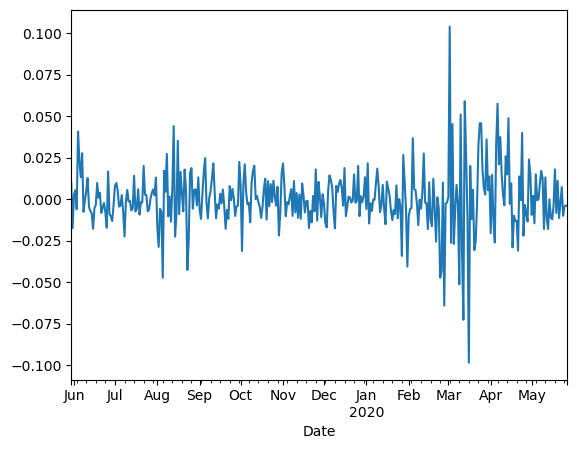

In [221]:
residuals.plot()

In [223]:
residuals.describe()

count    364.000000
mean       0.000263
std        0.018300
min       -0.098508
25%       -0.008139
50%       -0.001116
75%        0.009123
max        0.103877
dtype: float64

### Variations
* **ARIMA** - <br />
    model = ARIMA(df['Sales'], order=(q,d,p)) <br />
* **Autoregression** - <br />
    model = ARIMA(df['Sales'], order=(p,d,0)) <br />
* **Moving Avaerage Model** - <br />
    model = ARIMA(df['Sales'], order=(0,d,q)) <br />

In [225]:
output = model_fit.forecast()

In [227]:
output

2020-05-28   -0.001936
Freq: D, dtype: float64

In [233]:
# Assuming model_fit is your fitted ARIMA model
forecast_values = model_fit.forecast(steps=5)  # Replace 5 with the number of steps you want to forecast

# Access the first forecasted value using iloc for positional indexing
first_forecast = forecast_values.iloc[0]

### Walk Forward ARIMA

In [239]:
df = pd.read_csv('AAPL.csv', header=0, parse_dates=[0])

In [241]:
df.head()

,Date,Open,High,Low,Close,Adj Close,Volume
0,2015-05-28,32.965000,32.987499,32.775002,32.945000,29.692596,122933200
1,2015-05-29,32.807499,32.862499,32.474998,32.570000,29.354616,203538000
2,2015-06-01,32.570000,32.847500,32.512501,32.634998,29.413195,128451200
3,2015-06-02,32.465000,32.665001,32.330002,32.490002,29.282515,134670400
4,2015-06-03,32.665001,32.735001,32.474998,32.529999,29.318565,123934000


def parser(x):
return datetime.strptime('190'+x, '%Y-%m')

In [245]:
train_size = int(last_year_data.shape[0]*0.7)

In [255]:
train, test =last_year_data.Close[0:train_size], last_year_data.Close[train_size:]

In [257]:
test.shape

(110,)

In [263]:
train_size = int(last_year_data.shape[0] * 0.7)
train = last_year_data.Close.iloc[0:train_size]
test = last_year_data.Close.iloc[train_size:]

data = train.values  # Convert to numpy array for easier appending
predictions = []

for t in test:
    model = ARIMA(data, order=(5, 1, 0))
    model_fit = model.fit()
    y = model_fit.forecast()[0]  # Forecast returns a tuple, get the first element
    print(y)
    predictions.append(y)
    data = np.append(data, t)  # Append true value to train for the next iteration

# Calculate mean squared error
mse = ((test.values - predictions) ** 2).mean()
print(f"Mean Squared Error (MSE): {mse}")

79.833320045749
79.98701200173679
80.03865487403854
80.34974977239499
79.93006915626432
81.77918748305733
81.02793412681909
81.1559498374329
81.2914000760347
81.11356061768227
81.27566736494056
79.80651368705496
81.03340555425258
80.09090763729844
78.40814755793151
78.61176746786687
78.29639447833604
74.7264399134033
72.49359382323678
73.49465572139479
67.87182651535308
68.80662383662347
68.03515767283155
68.01859439679748
74.72862727801767
72.09165362988725
75.87137851308607
73.0875926715109
72.7481160993724
71.78346865753892
72.49603515243844
67.48626872950173
70.25633163397872
69.35673597601536
64.5463133434083
67.34565740850921
66.9344466254178
71.92229977554153
63.64486292917376
63.502430272389184
61.697559934207334
61.050915615031116
58.84274608830557
57.372020581478694
57.088030398104166
55.913920949306444
60.26572196732278
61.0511481265528
63.89479920313399
62.97308182591476
61.97187037583461
62.11919499831477
62.991998649465216
63.563224028661814
61.13391624049431
61.276256179

In [265]:
predict

[]

In [267]:
from sklearn.metrics import mean_squared_error
mse = mean_squared_error(test.values, predict)
mse

ValueError: Found input variables with inconsistent numbers of samples: [110, 0]

In [269]:
from pmdarima import auto_arima
import pandas as pd
apple_stock_data = pd.read_csv('AAPL.csv', index_col='Date', parse_dates=True)

# Fit AutoARIMA
model = auto_arima(apple_stock_data['Close'], seasonal=True, m=12)  # m=12 for monthly data

# Summarize the model
print(model.summary())

# Forecast
forecast = model.predict(n_periods=30)  # Forecasting 30 periods ahead
print(forecast)

                                      SARIMAX Results                                       
Dep. Variable:                                    y   No. Observations:                 1259
Model:             SARIMAX(1, 1, 0)x(0, 0, [1], 12)   Log Likelihood               -1641.855
Date:                              Sun, 23 Jun 2024   AIC                           3291.711
Time:                                      00:29:47   BIC                           3312.260
Sample:                                           0   HQIC                          3299.433
                                             - 1259                                         
Covariance Type:                                opg                                         
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
intercept      0.0440      0.029      1.517      0.129      -0.013       0.101
ar.L1         -0.18

/opt/anaconda3/lib/python3.11/site-packages/statsmodels/tsa/base/tsa_model.py:836: ValueWarning: No supported index is available. Prediction results will be given with an integer index beginning at `start`.
  return get_prediction_index(
/opt/anaconda3/lib/python3.11/site-packages/statsmodels/tsa/base/tsa_model.py:836: FutureWarning: No supported index is available. In the next version, calling this method in a model without a supported index will result in an exception.
  return get_prediction_index(


## SARIMA or Seasonal ARIMA 

	
SARIMA(p,d,q)(P,D,Q)m

* p: Trend autoregression order.
* d: Trend difference order.
* q: Trend moving average order.

**Seasonal Elements** -   
There are four seasonal elements that are not part of ARIMA that must be configured; they are:  

* P: Seasonal autoregressive order.
* D: Seasonal difference order.
* Q: Seasonal moving average order.
* m: The number of time steps for a single seasonal period.

In [ ]:
from statsmodels.tsa.statespace.sarimax import SARIMAX

In [ ]:
df = pd.read_csv('us-airlines-monthly-aircraft-miles-flown.csv', header=0 , parse_dates=[0])

In [ ]:
df.head()

In [ ]:
df.tail()

In [ ]:
df.index = df['Month'] 

In [ ]:
result_a = seasonal_decompose(df['MilesMM'], model='multiplicative')
result_a.plot()

In [ ]:
model = SARIMAX(df['MilesMM'], order=(5,1,3), seasonal_order=(1,1,1,12))

In [ ]:
model_fit = model.fit()

In [ ]:
residuals = model_fit.resid

In [ ]:
residuals.plot()

In [ ]:
output = model_fit.forecast()

In [ ]:
output

In [ ]:
model_fit.forecast(12)

In [ ]:
yhat = model_fit.predict()

In [ ]:
yhat.head()

In [ ]:
pyplot.plot(df['MilesMM'])
pyplot.plot(yhat, color='red')